Predict the onset of diabetes based on diagnostic measures

### Importing Required Libraries

In [14]:
# Load libraries
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [19]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("diabetes.csv")

In [20]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [22]:
pima.info(10);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data exploration
- Plot the correlation matrix and correlogram of the Diabetes dataset.

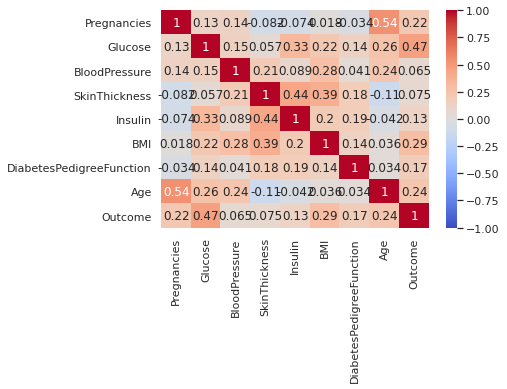

In [23]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


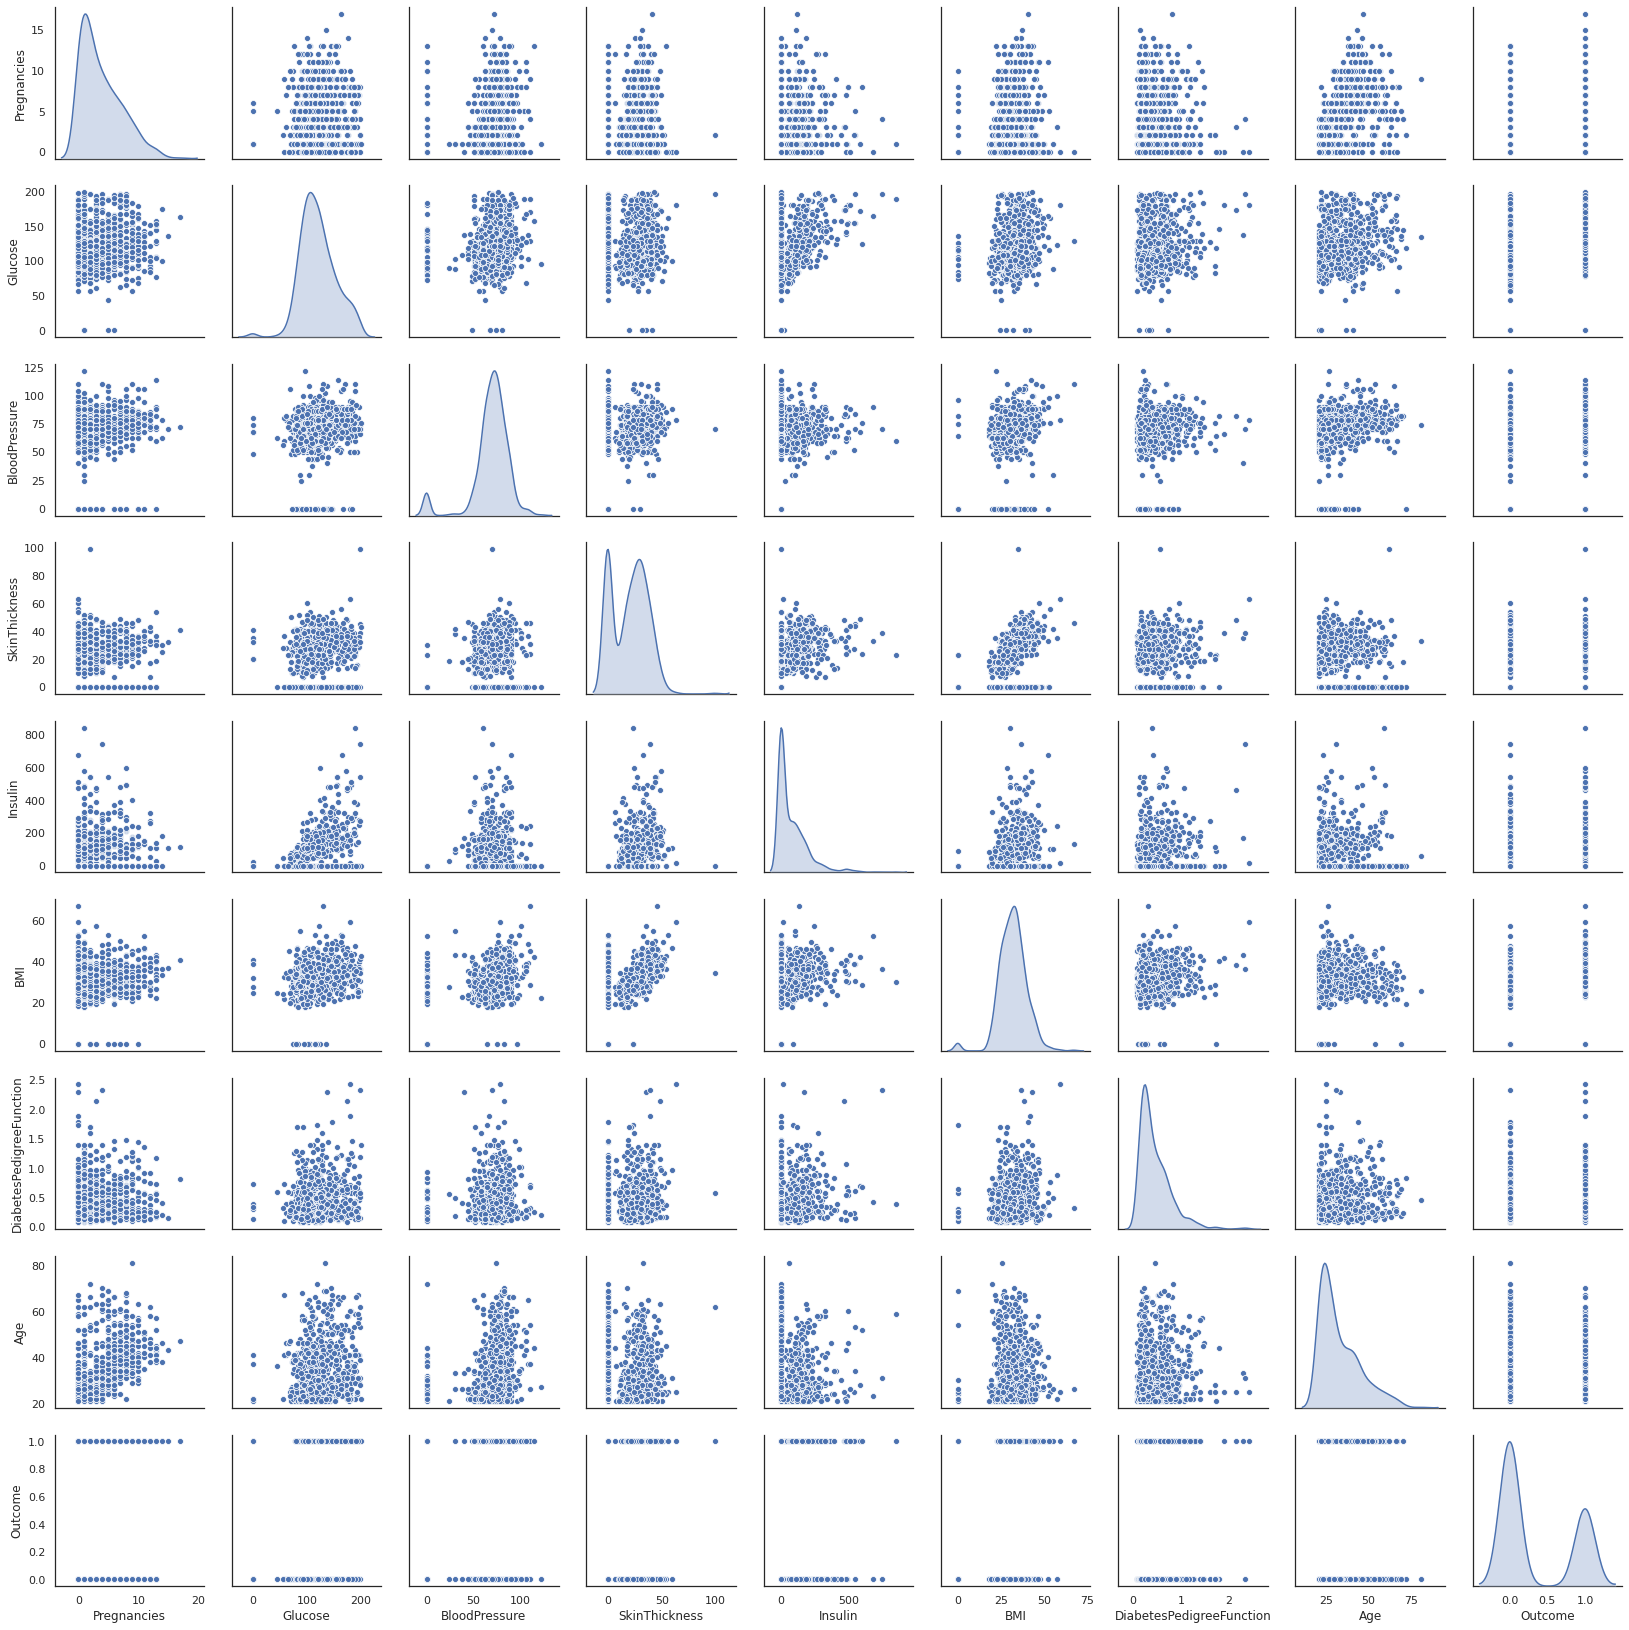

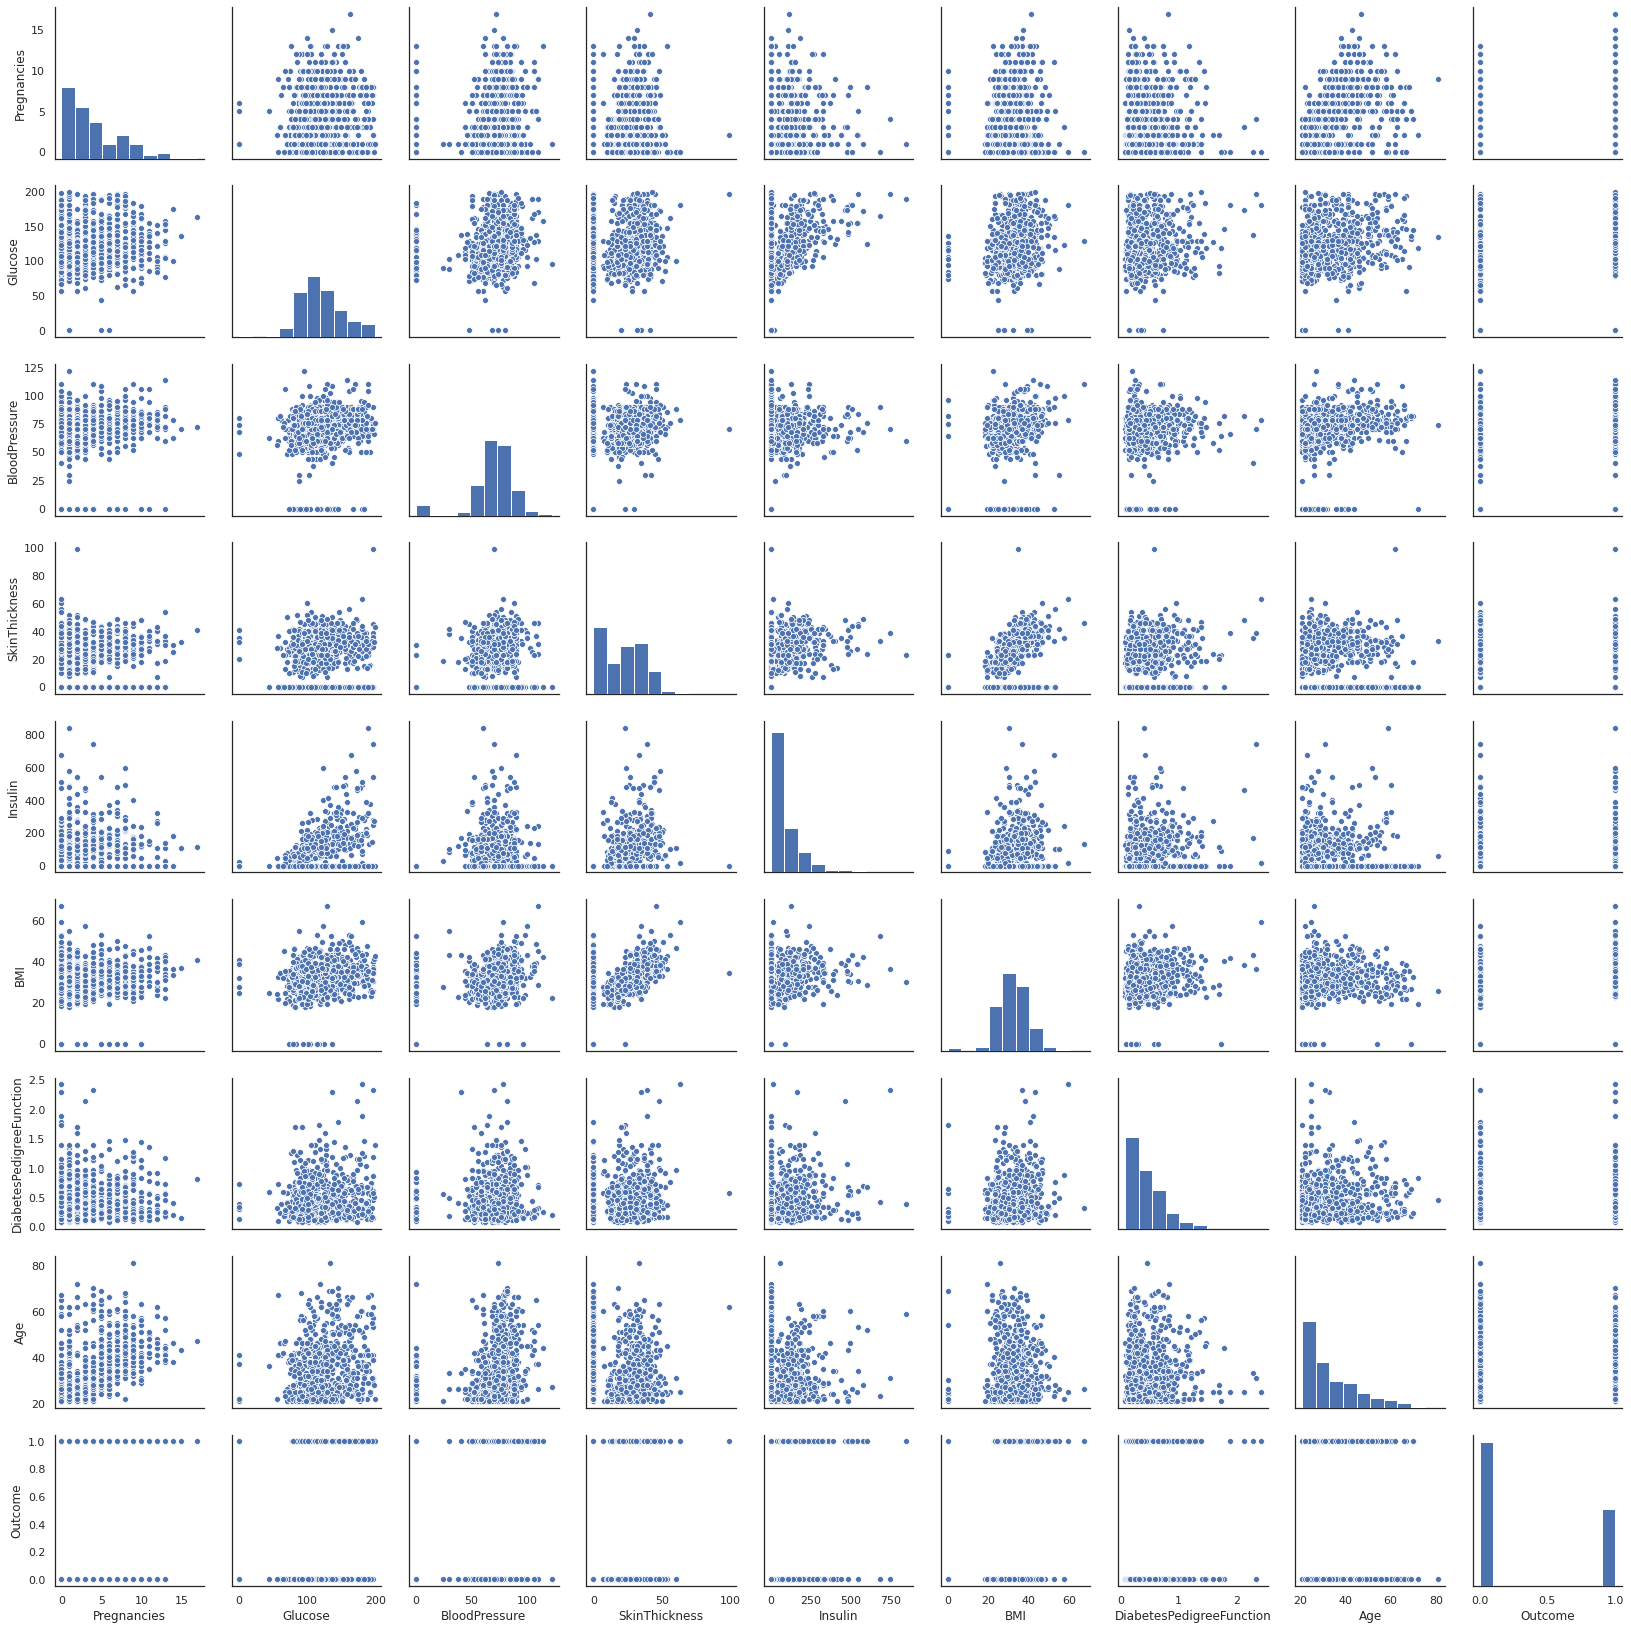

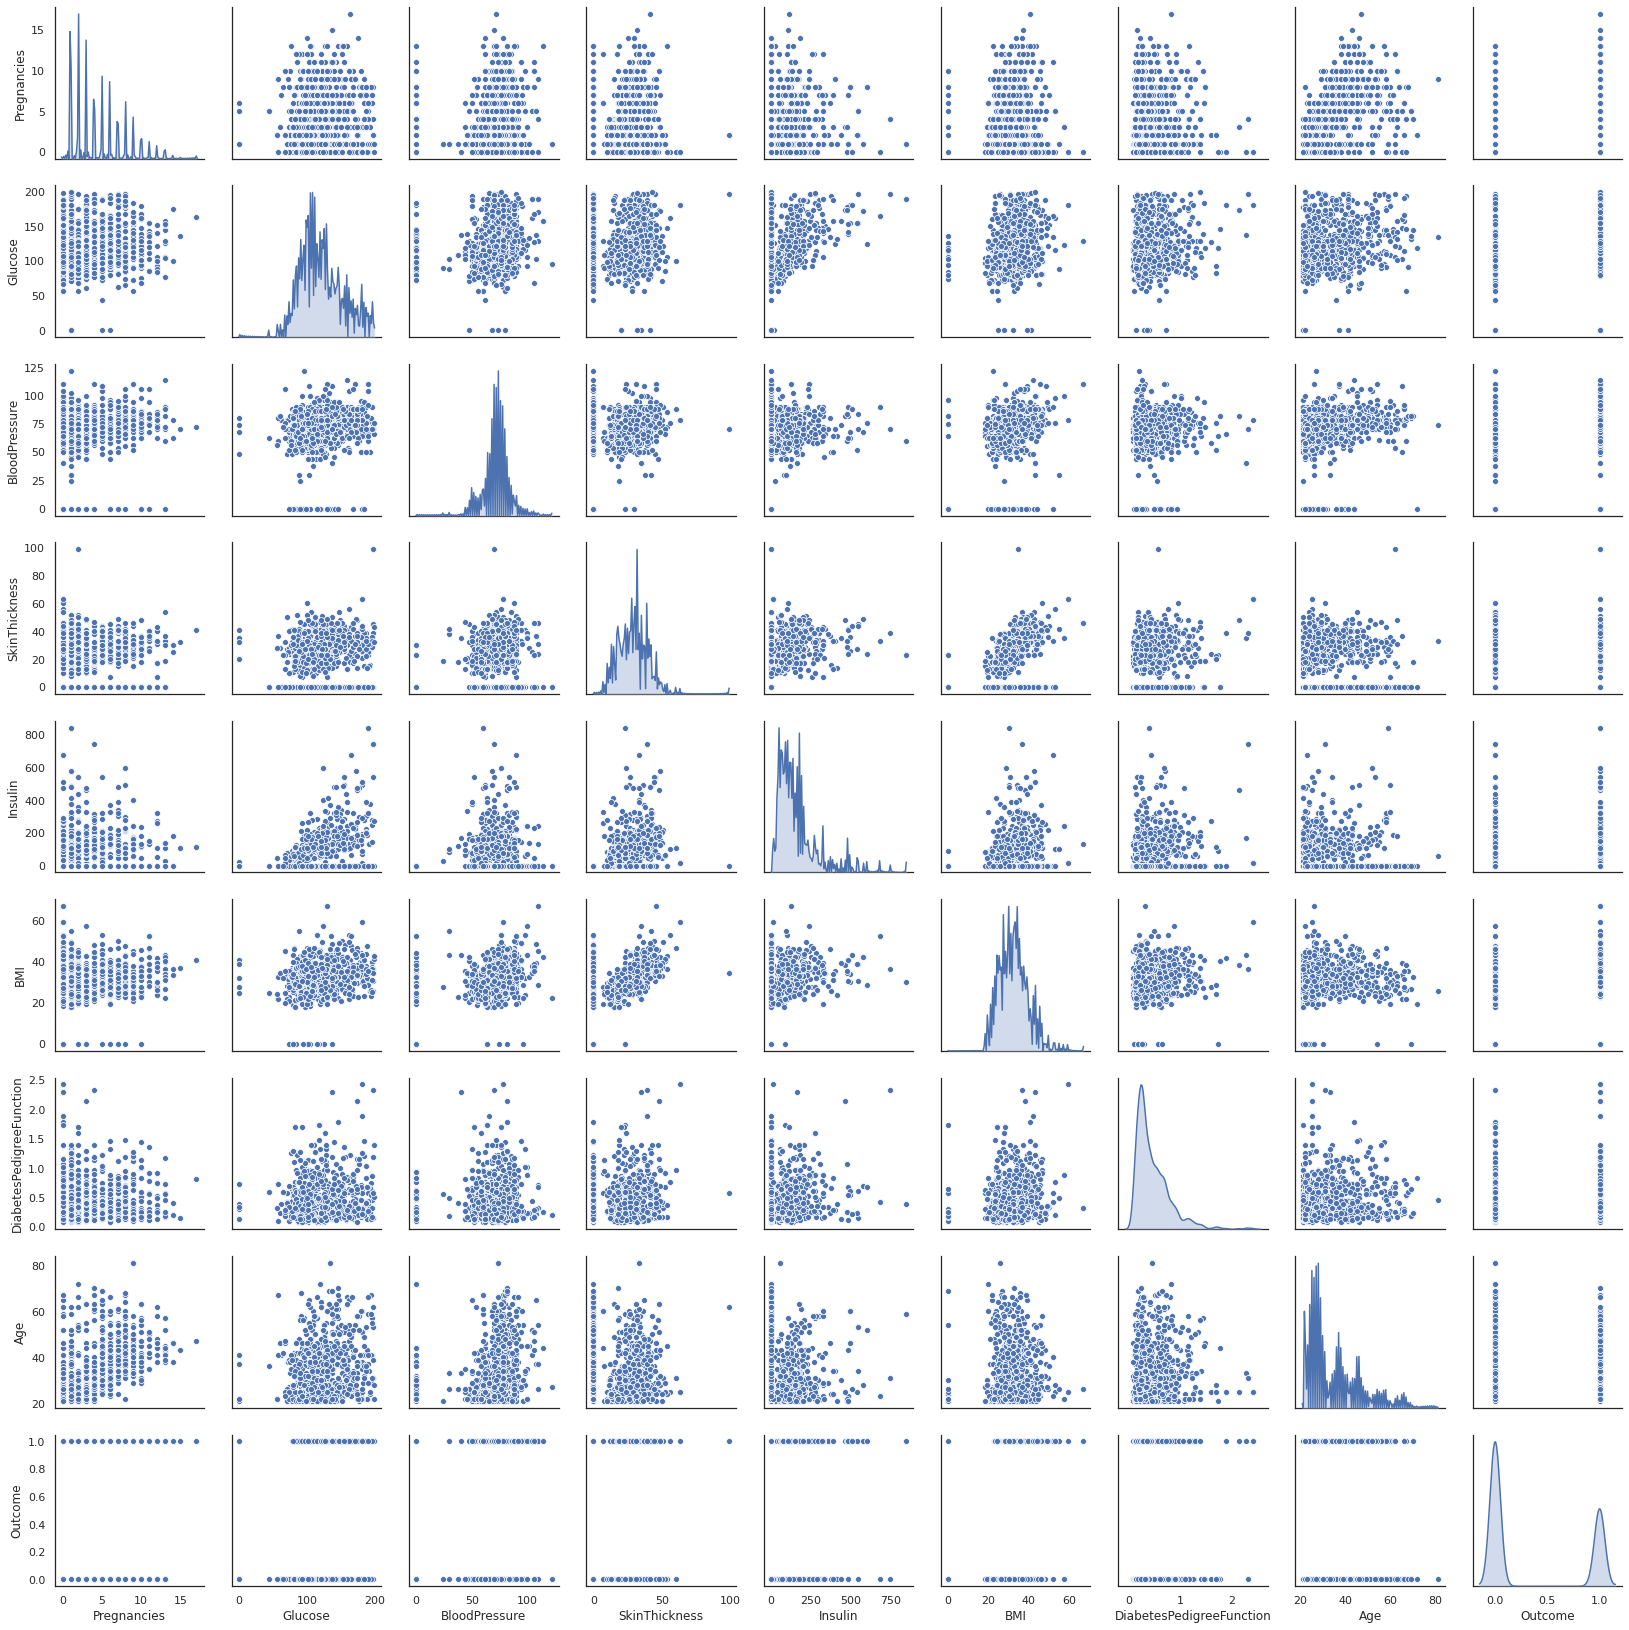

In [24]:
# https://python-graph-gallery.com/111-custom-correlogram/
import seaborn as sns
import matplotlib.pyplot as plt

df = pima
 
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
sns.pairplot(df, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )



Data exploration on diabetes patients



In [25]:
## Select only patients with diabetes 
df2 = df.copy()
df2.drop(df2[df2['Outcome'] == 0].index, inplace = True)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [26]:
## Remove the Outcome variable
df2 = df2.drop(['Outcome'], axis=1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53


In [27]:
## Print dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   268 non-null    int64  
 2   BloodPressure             268 non-null    int64  
 3   SkinThickness             268 non-null    int64  
 4   Insulin                   268 non-null    int64  
 5   BMI                       268 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.8 KB


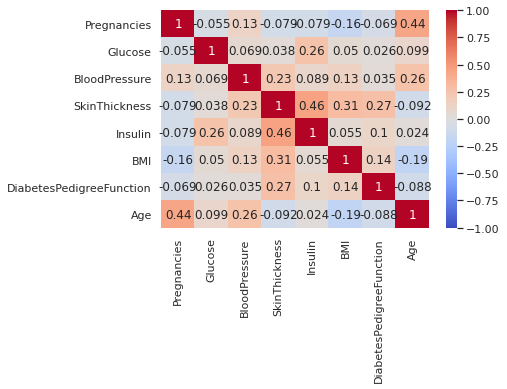

In [28]:
## Plot the correlation matrix
sns.set(style="white")
corrMtx = df2.corr()

sns.heatmap(corrMtx, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

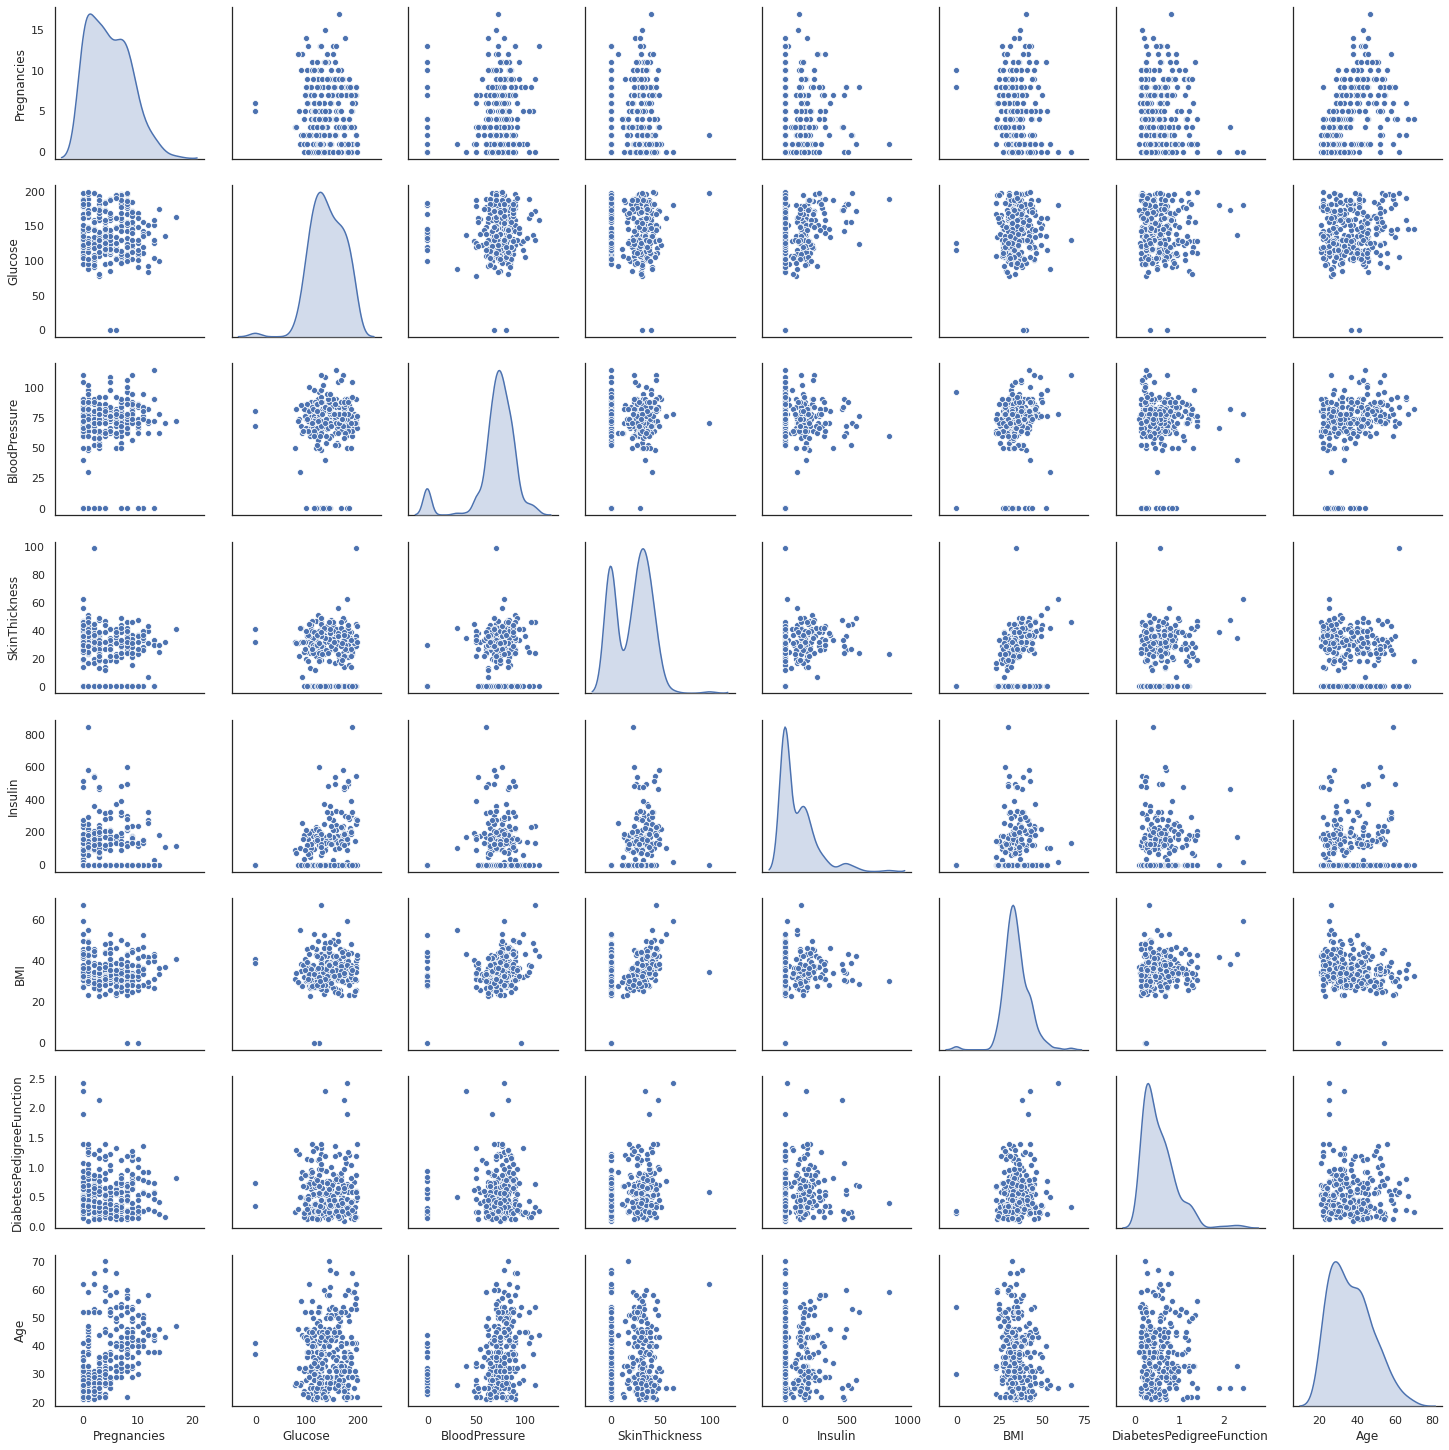

In [29]:
## Plot the correlogram
sns.pairplot(df2, diag_kind="kde")

#### The three variables with the highest correlation with Insulin are: 
- Skin Thickness 0.46
- Glucose 0.26
- Diabetes Pedigree Function 0.1

## Simple Linear Regression

In [30]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [31]:
import statsmodels.api as sm

## Build a simple linear regression model where the Insulin level is explained by the Glucose level of the patient.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Features (independent variables)
y = df_2.Insulin # Target variable

## Add intercept/constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Sun, 02 May 2021   Prob (F-statistic):           1.46e-05
Time:                        00:35:11   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
## Remove the intercept
independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Features (independent variables)
y = df_2.Insulin # Target variable

#X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              165.9
Date:                Sun, 02 May 2021   Prob (F-statistic):                    7.50e-30
Time:                        00:35:29   Log-Likelihood:                         -1693.4
No. Observations:                 268   AIC:                                      3389.
Df Residuals:                     267   BIC:                                      3392.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Glucose        0.7309      0.057     12.880      0.000       0.619       0.843
==============================================================================
Omnibus:                      102.632   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.859
Skew:                           1.716   Prob(JB):                     1.41e-67
Kurtosis:                       6.973   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual plots

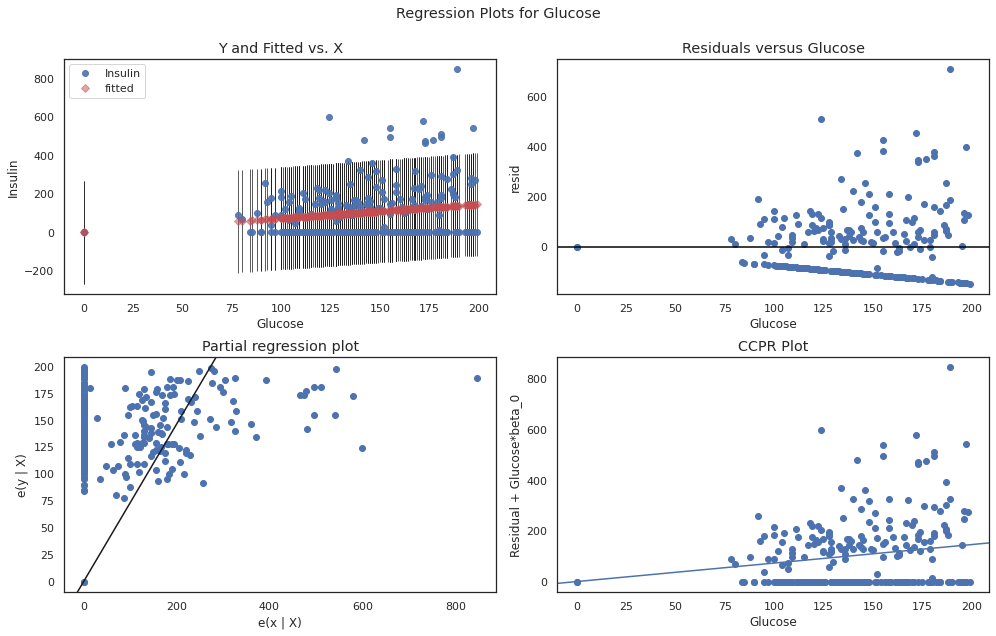

In [39]:
## Plot the residuals for the model
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

#define figure size
fig = plt.figure(figsize=(14,9))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

Single Regression models


In [16]:
## Train the model using BMI to predict Insulin.
independent1 = 'BMI'
feature_cols1 = [independent1]
X1 = df2[feature_cols1] # Features (independent variables)
y1 = df2.Insulin # Target variable

X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8104
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.369
Time:                        11:44:38   Log-Likelihood:                -1701.2
No. Observations:                 268   AIC:                             3406.
Df Residuals:                     266   BIC:                             3414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3523     41.948      1.510      0.132     -19.240     145.944
BMI            1.0524      1.169      0.900      0.369      -1.249       3.354
==============================================================================
Omnibus:                      112.049   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.700
Skew:                           1.848   Prob(JB):                     1.43e-80
Kurtosis:                       7.390   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

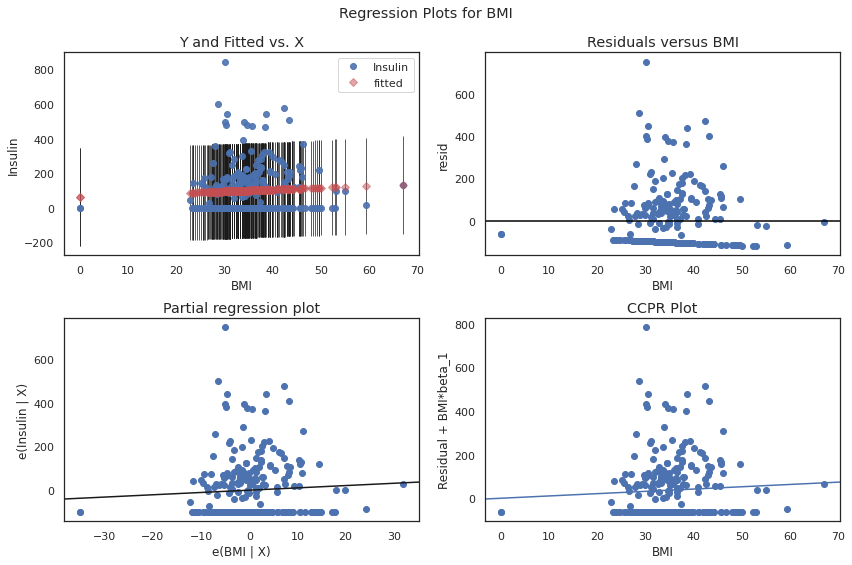

In [17]:
## Plot residuals of the model that uses BMI to predict Insulin.
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, independent1, fig=fig)

In [18]:
## Train the model using Age to predict Insulin.
independent2 = 'Age'
feature_cols2 = [independent2]
X2 = df2[feature_cols2] # Features (independent variables)
y2 = df2.Insulin # Target variable

X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1526
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.696
Time:                        11:44:39   Log-Likelihood:                -1701.5
No. Observations:                 268   AIC:                             3407.
Df Residuals:                     266   BIC:                             3414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1133     29.956      2.975      0.003      30.131     148.095
Age            0.3028      0.775      0.391      0.696      -1.223       1.829
==============================================================================
Omnibus:                      108.908   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.696
Skew:                           1.816   Prob(JB):                     1.72e-74
Kurtosis:                       7.151   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

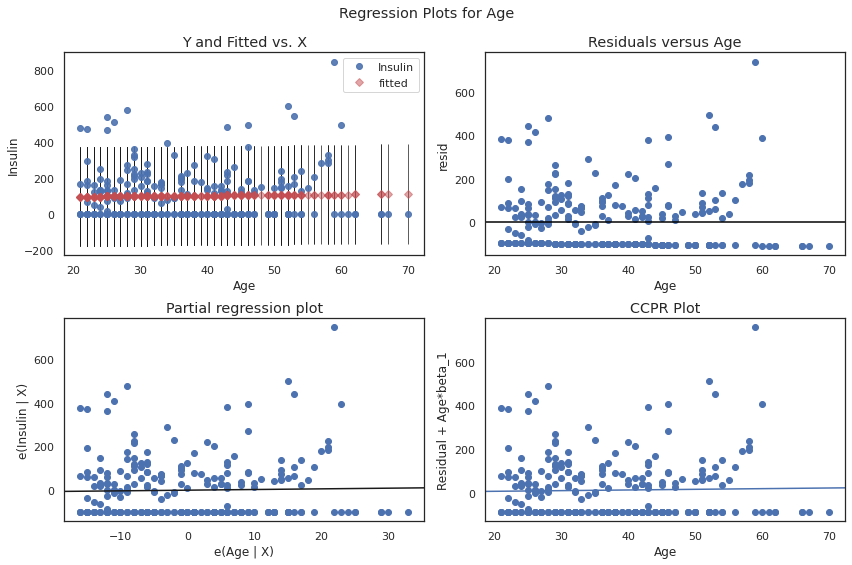

In [19]:
## Plot residuals of the model that uses Age to predict Insulin.
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model2, independent2, fig=fig)

In [20]:
## Train the model using SkinThickness to predict Insulin.
independent3 = 'SkinThickness'
feature_cols3 = [independent3]
X3 = df2[feature_cols3] # Features (independent variables)
y3 = df2.Insulin # Target variable

#X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              241.8
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                    2.90e-39
Time:                        11:44:41   Log-Likelihood:                         -1671.8
No. Observations:                 268   AIC:                                      3346.
Df Residuals:                     267   BIC:                                      3349.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     4.1601      0.268     15.550      0.000       3.633       4.687
==============================================================================
Omnibus:                      111.418   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.651
Skew:                           1.604   Prob(JB):                    1.01e-130
Kurtosis:                       9.582   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

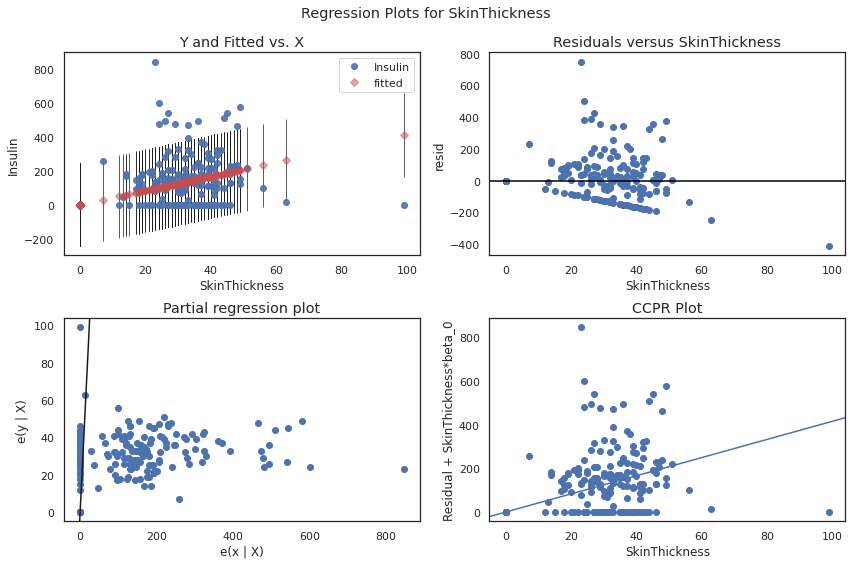

In [21]:
## Plot residuals of the model that uses SkinThickness to predict Insulin.
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model3, independent3, fig=fig)

In [22]:
## Train the model using DiabetesPedigreeFunction to predict Insulin.
independent4 = 'DiabetesPedigreeFunction'
feature_cols4 = [independent4]
X4 = df2[feature_cols4] # Features (independent variables)
y4 = df2.Insulin # Target variable

X4 = sm.add_constant(X4)
model4 = sm.OLS(y4, X4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.773
Date:                Wed, 14 Apr 2021   Prob (F-statistic):             0.0971
Time:                        11:44:42   Log-Likelihood:                -1700.2
No. Observations:                 268   AIC:                             3404.
Df Residuals:                     266   BIC:                             3412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       79.5107     15.090      5.269      0.000      49.799     109.223
DiabetesPedigreeFunction    37.8294     22.719      1.665      0.097      -6.903      82.562
==============================================================================
Omnibus:                      114.232   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.080
Skew:                           1.874   Prob(JB):                     1.46e-84
Kurtosis:                       7.531   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

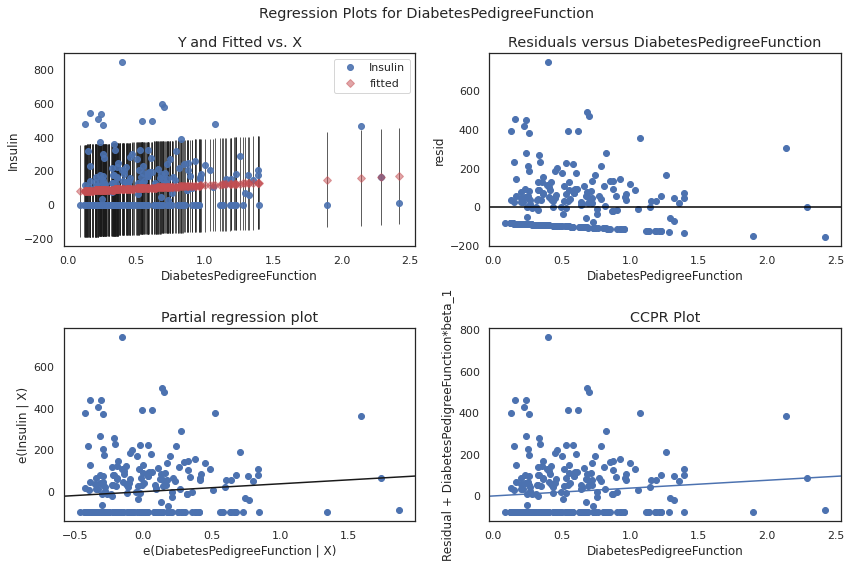

In [23]:
## Plot residuals of the model that uses DiabetesPedigreeFunction to predict Insulin.
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model4, independent4, fig=fig)

#### The best model is the one that uses Skin Thickness to predict Insulin. Its R2 is 0.475 and all its coefficients are significant.

## Multiple Linear Regression

In [24]:
## Build a multiple linear regression model with all the variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable

In [25]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     14.75
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.56e-16
Time:                        11:44:43   Log-Likelihood:                -1656.8
No. Observations:                 268   AIC:                             3330.
Df Residuals:                     260   BIC:                             3358.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -62.1602     56.833     -1.094      0.275    -174.073      49.752
Glucose                      1.0458      0.231      4.527      0.000       0.591       1.501
BMI                         -1.9586      1.084     -1.807      0.072      -4.093       0.176
Age                          0.7957      0.784      1.015      0.311      -0.748       2.339
DiabetesPedigreeFunction    -8.9662     20.395     -0.440      0.661     -49.127      31.194
SkinThickness                3.8721      0.458      8.462      0.000       2.971       4.773
Pregnancies                 -2.5319      2.194     -1.154      0.250      -6.852       1.788
BloodPressure               -0.2042      0.367     -0.557      0.578      -0.926       0.518
==============================================================================
Omnibus:                       95.750   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.256
Skew:                           1.354   Prob(JB):                    1.28e-107
Kurtosis:                       9.062   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Eliminate multicollinearity

In [26]:
## Reorder columns by setting Insulin as the last column
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [27]:
## Identify collinearity of every predictor using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Prints the VIF coefficient of the dataframe except for the last column.
## VIF > 10 indica alta multicolinearidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))
    

In [28]:
printVIF(df_3)

VIF for Glucose: 17.69
VIF for BMI: 18.12
VIF for Age: 15.28
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 4.06
VIF for Pregnancies: 3.47
VIF for BloodPressure: 13.51


#### Answer the following questions:
- Which variables have a VIF higher than 10?
- Which variables with a high p-value should be removed?
- Which variables would VIF recommend to remove?

In [29]:
# Remove BloodPressure
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for Glucose: 17.34
VIF for BMI: 16.54
VIF for Age: 13.34
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 3.9
VIF for Pregnancies: 3.46


In [30]:
# Remove Glucose
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for BMI: 10.62
VIF for Age: 10.91
VIF for DiabetesPedigreeFunction: 3.37
VIF for SkinThickness: 3.83
VIF for Pregnancies: 3.45


In [31]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     15.42
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.73e-13
Time:                        11:44:43   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     262   BIC:                             3368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       55.4586     50.487      1.098      0.273     -43.953     154.870
BMI                         -1.7902      1.112     -1.610      0.109      -3.979       0.399
Age                          1.1787      0.775      1.522      0.129      -0.346       2.704
DiabetesPedigreeFunction    -7.0214     21.103     -0.333      0.740     -48.574      34.531
SkinThickness                3.8583      0.463      8.339      0.000       2.947       4.769
Pregnancies                 -3.6079      2.257     -1.599      0.111      -8.052       0.836
==============================================================================
Omnibus:                      107.512   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.093
Skew:                           1.596   Prob(JB):                    4.20e-109
Kurtosis:                       8.874   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
## Remove the DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     19.31
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           6.07e-14
Time:                        11:44:43   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3344.
Df Residuals:                     263   BIC:                             3362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.5139     49.621      1.058      0.291     -45.191     150.219
BMI              -1.8066      1.109     -1.629      0.104      -3.990       0.376
Age               1.1899      0.773      1.540      0.125      -0.331       2.711
SkinThickness     3.8208      0.448      8.529      0.000       2.939       4.703
Pregnancies      -3.5932      2.253     -1.595      0.112      -8.029       0.843
==============================================================================
Omnibus:                      107.886   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.934
Skew:                           1.602   Prob(JB):                    1.01e-109
Kurtosis:                       8.890   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## Remove Pregnancies
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     24.76
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.80e-14
Time:                        11:44:43   Log-Likelihood:                -1668.4
No. Observations:                 268   AIC:                             3345.
Df Residuals:                     264   BIC:                             3359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.5188     49.730      0.996      0.320     -48.400     147.437
BMI              -1.6714      1.109     -1.508      0.133      -3.854       0.512
SkinThickness     3.8336      0.449      8.534      0.000       2.949       4.718
Age               0.6633      0.700      0.947      0.345      -0.716       2.042
==============================================================================
Omnibus:                      114.650   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.984
Skew:                           1.692   Prob(JB):                    1.03e-124
Kurtosis:                       9.299   Cond. No.                         375.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
## Remove the intercept
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              83.66
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                    4.12e-38
Time:                        11:44:43   Log-Likelihood:                         -1668.9
No. Observations:                 268   AIC:                                      3344.
Df Residuals:                     265   BIC:                                      3355.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI              -0.7761      0.649     -1.197      0.233      -2.053       0.501
SkinThickness     3.8259      0.449      8.518      0.000       2.942       4.710
Age               1.1244      0.525      2.140      0.033       0.090       2.159
==============================================================================
Omnibus:                      111.599   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.618
Skew:                           1.644   Prob(JB):                    1.22e-119
Kurtosis:                       9.183   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
## Remove the BMI
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.484
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                              124.6
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                    6.63e-39
Time:                        11:44:43   Log-Likelihood:                         -1669.6
No. Observations:                 268   AIC:                                      3343.
Df Residuals:                     266   BIC:                                      3350.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     3.5618      0.392      9.098      0.000       2.791       4.333
Age               0.5975      0.287      2.082      0.038       0.032       1.163
==============================================================================
Omnibus:                      118.886   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.813
Skew:                           1.759   Prob(JB):                    7.65e-132
Kurtosis:                       9.457   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature selection with Recursive Feature Elimination (RFE)

In [36]:
from sklearn.feature_selection import RFE

feature_cols = ['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']
X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable
names=pd.DataFrame(X.columns)


In [37]:
#use linear regression as the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [38]:
## Look for the best set with 2 features
rfe_mod = RFE(lin_reg, 2, step=1) 
myvalues=rfe_mod.fit(X,y) #to fit
#myvalues.support_#The mask of selected features.
#myvalues.ranking_
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [39]:
## Print the list of ranked variables. Selected feature will have a 1.
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

,Feature,Rank
0,Glucose,4
1,BMI,3
2,Age,5
3,DiabetesPedigreeFunction,1
4,SkinThickness,1
5,Pregnancies,2
6,BloodPressure,6


In [40]:
#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                    Feature  Rank
3  DiabetesPedigreeFunction     1
4             SkinThickness     1


2

In [41]:
## Build the multiple linear regression model with the selected variables
feature_cols = ['DiabetesPedigreeFunction','SkinThickness']
X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     35.02
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.20e-14
Time:                        11:44:43   Log-Likelihood:                -1670.2
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     265   BIC:                             3357.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       24.9522     15.079      1.655      0.099      -4.739      54.643
DiabetesPedigreeFunction    -9.4573     21.158     -0.447      0.655     -51.116      32.202
SkinThickness                3.6360      0.446      8.160      0.000       2.759       4.513
==============================================================================
Omnibus:                      121.261   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.307
Skew:                           1.788   Prob(JB):                    6.72e-139
Kurtosis:                       9.648   Cond. No.                         88.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Linear Multiple Regression



In [42]:
df3 = df2[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]

def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))

printVIF(df3)

VIF for Glucose: 17.69
VIF for BMI: 18.12
VIF for Age: 15.28
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 4.06
VIF for Pregnancies: 3.47
VIF for BloodPressure: 13.51


In [43]:
df4 = df3[['Glucose', 'BloodPressure', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df4)

VIF for Glucose: 12.83
VIF for BloodPressure: 12.33
VIF for Age: 15.11
VIF for DiabetesPedigreeFunction: 3.32
VIF for SkinThickness: 3.71
VIF for Pregnancies: 3.46


In [44]:
df5 = df4[['Glucose', 'BloodPressure','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df5)

VIF for Glucose: 9.96
VIF for BloodPressure: 10.28
VIF for DiabetesPedigreeFunction: 3.31
VIF for SkinThickness: 3.68
VIF for Pregnancies: 2.68


In [45]:
df6 = df5[['Glucose','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df6)

VIF for Glucose: 5.19
VIF for DiabetesPedigreeFunction: 3.29
VIF for SkinThickness: 3.34
VIF for Pregnancies: 2.46


In [46]:
feature_cols = ['Glucose','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df6[feature_cols] # Features (independent variables)
y = df6.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.91e-17
Time:                        11:44:44   Log-Likelihood:                -1659.5
No. Observations:                 268   AIC:                             3329.
Df Residuals:                     263   BIC:                             3347.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -115.7120     37.128     -3.117      0.002    -188.818     -42.606
Glucose                      1.0570      0.229      4.610      0.000       0.606       1.508
DiabetesPedigreeFunction   -11.6457     20.431     -0.570      0.569     -51.875      28.584
SkinThickness                3.5572      0.431      8.258      0.000       2.709       4.405
Pregnancies                 -1.1692      1.964     -0.595      0.552      -5.037       2.698
==============================================================================
Omnibus:                      106.119   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.628
Skew:                           1.512   Prob(JB):                    1.23e-124
Kurtosis:                       9.477   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
feature_cols = ['Glucose','SkinThickness','Pregnancies']
X = df6[feature_cols] # Features (independent variables)
y = df6.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           7.34e-18
Time:                        17:42:53   Log-Likelihood:                -1659.6
No. Observations:                 268   AIC:                             3327.
Df Residuals:                     264   BIC:                             3342.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -120.6588     36.053     -3.347      0.001    -191.647     -49.670
Glucose           1.0551      0.229      4.608      0.000       0.604       1.506
SkinThickness     3.4911      0.414      8.427      0.000       2.675       4.307
Pregnancies      -1.1146      1.959     -0.569      0.570      -4.973       2.743
==============================================================================
Omnibus:                      106.715   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.675
Skew:                           1.519   Prob(JB):                    2.20e-126
Kurtosis:                       9.526   Cond. No.                         725.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
feature_cols = ['Glucose','SkinThickness']
X = df6[feature_cols] # Features (independent variables)
y = df6.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              130.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    3.68e-40
Time:                        17:59:11   Log-Likelihood:                         -1666.7
No. Observations:                 268   AIC:                                      3337.
Df Residuals:                     266   BIC:                                      3345.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Glucose           0.2577      0.080      3.205      0.002       0.099       0.416
SkinThickness     3.1483      0.411      7.662      0.000       2.339       3.957
==============================================================================
Omnibus:                      127.198   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.529
Skew:                           1.891   Prob(JB):                    2.05e-147
Kurtosis:                       9.796   Cond. No.                         8.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
feature_cols = ['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']
X = df3[feature_cols] # Features (independent variables)
y = df3.Insulin # Target variable
names=pd.DataFrame(X.columns)

In [96]:
lin_reg = LinearRegression()
rfe_mod = RFE(lin_reg, 2, step=1) 
myvalues=rfe_mod.fit(X,y) #to fit
#myvalues.support_#The mask of selected features.
#myvalues.ranking_
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


,Feature,Rank
0,Glucose,4
1,BMI,3
2,Age,5
3,DiabetesPedigreeFunction,1
4,SkinThickness,1
5,Pregnancies,2
6,BloodPressure,6


In [97]:
feature_cols = ['BMI','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df3[feature_cols] # Features (independent variables)
y = df3.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     18.60
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.77e-13
Time:                        17:47:31   Log-Likelihood:                -1668.2
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     263   BIC:                             3364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       99.9581     41.260      2.423      0.016      18.716     181.200
BMI                         -1.9881      1.107     -1.796      0.074      -4.167       0.191
DiabetesPedigreeFunction    -8.4138     21.136     -0.398      0.691     -50.030      33.203
SkinThickness                3.8490      0.464      8.298      0.000       2.936       4.762
Pregnancies                 -2.1443      2.047     -1.048      0.296      -6.175       1.886
==============================================================================
Omnibus:                      116.322   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.980
Skew:                           1.720   Prob(JB):                    4.21e-127
Kurtosis:                       9.347   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
feature_cols = ['BMI','SkinThickness','Pregnancies']
X = df3[feature_cols] # Features (independent variables)
y = df3.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     24.83
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.49e-14
Time:                        17:48:02   Log-Likelihood:                -1668.3
No. Observations:                 268   AIC:                             3345.
Df Residuals:                     264   BIC:                             3359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            96.9292     40.488      2.394      0.017      17.209     176.649
BMI              -2.0100      1.104     -1.821      0.070      -4.183       0.163
SkinThickness     3.8038      0.449      8.471      0.000       2.920       4.688
Pregnancies      -2.1100      2.042     -1.033      0.302      -6.131       1.910
==============================================================================
Omnibus:                      116.922   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              587.815
Skew:                           1.729   Prob(JB):                    2.28e-128
Kurtosis:                       9.379   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
feature_cols = ['BMI','SkinThickness']
X = df3[feature_cols] # Features (independent variables)
y = df3.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              121.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    3.16e-38
Time:                        18:02:47   Log-Likelihood:                         -1671.2
No. Observations:                 268   AIC:                                      3346.
Df Residuals:                     266   BIC:                                      3354.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI               0.3868      0.356      1.086      0.279      -0.315       1.088
SkinThickness     3.7655      0.451      8.344      0.000       2.877       4.654
==============================================================================
Omnibus:                      118.056   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.653
Skew:                           1.725   Prob(JB):                    5.09e-137
Kurtosis:                       9.657   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insulin = 0.2577 * Glucose + 3.1483 * SkinThickness